# Libraries


In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Variables

**Duty cycle**

In [115]:
timeSleepSecond = 53%50 +5
timeSleepSecondMicro = timeSleepSecond*10e+5
print(timeSleepSecondMicro, "microseconds")

8000000.0 microseconds


**Battery**

In [116]:
JBattery= 6953%5000+15000
print(JBattery, "Joule")

16953 Joule


# Dataset Analysis

Load the dataset and consequently plot the diagram \

**Structure of the dataset**

In [117]:
dataset = pd.read_csv("/deep_sleep.csv")
print(dataset.head(3))

                    Timestamp   Data
0  2024-03-03 20:14:47.705952  59.89
1  2024-03-03 20:14:47.756244  59.50
2  2024-03-03 20:14:47.805842  59.82


**Description of the dataset**

In [118]:
print(dataset.describe())

             Data
count  726.000000
mean   196.190455
std    229.660507
min     58.640000
25%     59.530000
50%     59.860000
75%    308.632500
max    778.710000


From this graph it's possible to distinguish when the ESP32 is in a particular state.

<Axes: title={'center': 'Power consuption (Deep Sleep - Idle - WIFI on - WIFI off)'}, xlabel='time [s]', ylabel='Power [mW]'>

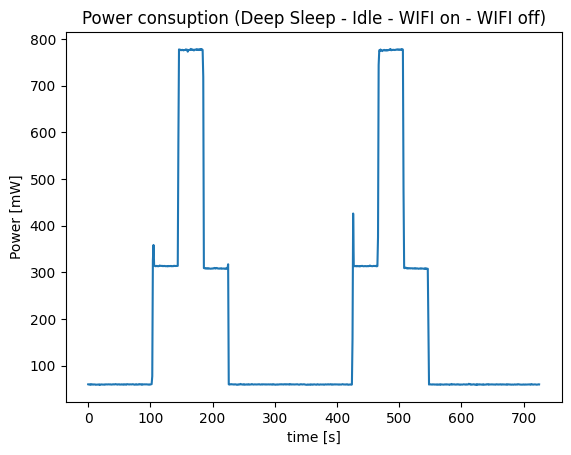

In [119]:
dataset.plot(xlabel="time [s]", ylabel="Power [mW]", title="Power consuption (Deep Sleep - Idle - WIFI on - WIFI off)", kind="line", legend=False)

# Average Power

Computing the average power consuption during the **deep sleep** state, it's filtered all the datapoints below the 100W

In [120]:
records = dataset["Data"]
averagePowerDS = records[records< 100].mean().round(3)
print(averagePowerDS, "mW")

59.661 mW


Instead here the ESP32 is in the **idle** state, in this state the board is actibe but the WIFI is off

In [121]:
records = dataset["Data"]
averagePowerIS = records[records> 300][records< 400].mean().round(3)
print(averagePowerIS, "mW")

311.672 mW


The latter is the **Transmission** state

In [122]:
records = dataset["Data"]
averagePowerTS = records[records> 750].mean().round(3)
print(averagePowerTS, "mW")

776.621 mW


# Sensor transmitting

Load the dataset and consequently plot the diagram




**Structure of the dataset**

In [123]:
dataset = pd.read_csv("/transmission_power.csv")
print(dataset.head(3))

                    Timestamp    Data
0  2024-03-03 19:04:29.955113  704.75
1  2024-03-03 19:04:30.005088  703.82
2  2024-03-03 19:04:30.054739  704.65


<Axes: title={'center': 'Power Consuption Idle Send (19.5 and 2 dBm)'}, xlabel='time [s]', ylabel='Power [mW]'>

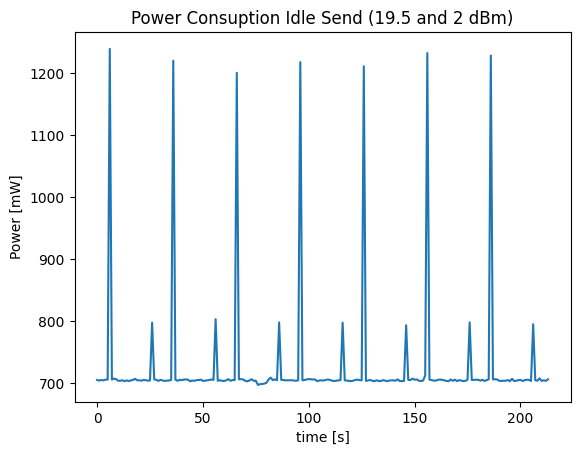

In [124]:
dataset.plot(xlabel="time [s]", ylabel="Power [mW]", title="Power Consuption Idle Send (19.5 and 2 dBm)", kind="line", legend=False)

# Average power

Board on the **Idle** state, where is sending at 2 dBm

In [125]:
records = dataset["Data"]
averagePowerIS2 = records[records> 750][records< 800].mean().round(3)
print(averagePowerIS2, "mW")

796.358 mW


Board while the sensor is in the **transmitting** state at 19.5 dBm

In [126]:
records = dataset["Data"]
averagePowerTS2 = records[records> 1200].mean().round(3)
print(averagePowerTS2, "mW")

1221.76 mW


# Sensor Reading

Load the dataset and consequently plot the diagram

In [127]:
dataset = pd.read_csv("/sensor_read.csv")
print(dataset.head(3))

                    Timestamp    Data
0  2024-03-03 20:24:46.935040  467.11
1  2024-03-03 20:24:46.984494  466.25
2  2024-03-03 20:24:47.034875  466.68


<Axes: title={'center': 'Power Consumption (Idle - Sensor read)'}, xlabel='time [s]', ylabel='Power [mW]'>

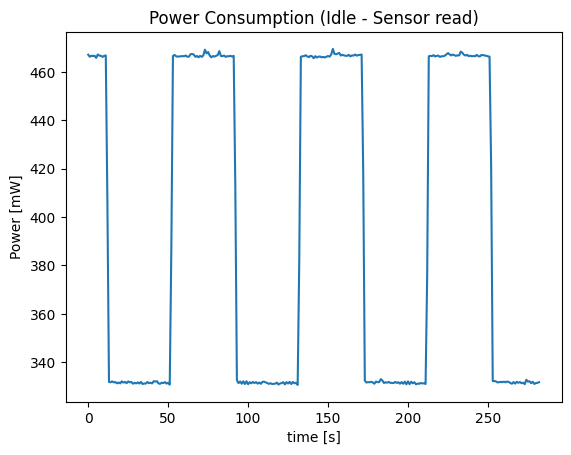

In [128]:
dataset.plot(xlabel="time [s]", ylabel="Power [mW]", title="Power Consumption (Idle - Sensor read)", kind="line", legend=False)

# Average power

**Idle** state of the sensor

In [129]:
records = dataset["Data"]
averagePowerIS3 = records[records< 340].mean().round(3)
print(averagePowerIS3, "mW")

331.586 mW


**Sensor reading** state

In [130]:
records = dataset["Data"]
averagePowerSR = records[records> 460].mean().round(3)
print(averagePowerSR, "mW")

466.745 mW


# Outcome

Final results of all the powering average

In [131]:
print("Power in deep sleep state: ", averagePowerDS, "mW")
print("Power in idle state: ", averagePowerIS, "mW")
print("Power in transmission state: ", averagePowerTS, "mW")
print("Power in idle state at 2 dBm: ", averagePowerIS2, "mW")
print("Power in transmission state at 19.5 dBm: ", averagePowerTS2, "mW")
print("Power in idle state at sensor reading: ", averagePowerIS3, "mW")
print("Power in transmission state at sensor reading: ", averagePowerSR, "mW")

Power in deep sleep state:  59.661 mW
Power in idle state:  311.672 mW
Power in transmission state:  776.621 mW
Power in idle state at 2 dBm:  796.358 mW
Power in transmission state at 19.5 dBm:  1221.76 mW
Power in idle state at sensor reading:  331.586 mW
Power in transmission state at sensor reading:  466.745 mW


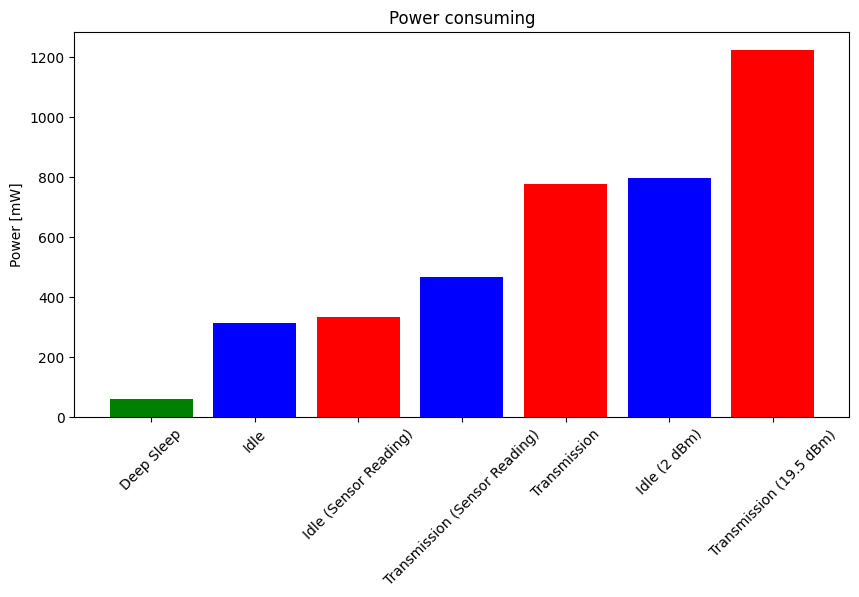

In [136]:
states = [
    "Deep Sleep", "Idle", "Transmission",
    "Idle (2 dBm)", "Transmission (19.5 dBm)",
    "Idle (Sensor Reading)", "Transmission (Sensor Reading)"
]

power_values = [
    averagePowerDS, averagePowerIS, averagePowerTS,
    averagePowerIS2, averagePowerTS2,
    averagePowerIS3, averagePowerSR
]

sorted_data = sorted(zip(power_values, states))
sorted_power_values, sorted_states = zip(*sorted_data)

plt.figure(figsize=(10, 5))
plt.bar(sorted_states, sorted_power_values, color=['green', 'blue', 'red', 'blue', 'red', 'blue', 'red'])

plt.ylabel("Power [mW]")
plt.title("Power consuming")
plt.xticks(rotation=45)

plt.show()


In our case we don't consume Transmission power at 19.5 dBm, due the fact that we use the component only at 2dBm

# Time estimation

find out the dataset

# Energy consumption

We can see the average energy consuption for each state

In [137]:
print("Energy consuption on the **deep sleep** state ",averagePowerDS*timeSL ," nJ")
print("Energy consuption on the **idle** state ",averagePowerIS*timeSL ," nJ")
print("Energy consuption on the **transmission** state ",averagePowerTS*timeSL ," nJ")
print("Energy consuption on the **idle** state at 2 dBm ",averagePowerIS2*timeSL ," nJ")
print("Energy consuption on the **transmission** state at 19.5 dBm ",averagePowerTS2*timeSL ," nJ")
print("Energy consuption on the **idle** state at sensor reading ",averagePowerIS3*timeSL ," nJ")
print("Energy consuption on the **transmission** state at sensor reading ",averagePowerSR*timeSL ," nJ")


NameError: name 'timeSL' is not defined